## Análise Exploraória de Dados

In [1]:
import pandas as pd
import os
from termcolor import colored
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

caminho = '../data/raw'

# Leitura dos conjuntos de dados
tabelas = {
    os.path.splitext(arquivo)[0]: pd.read_csv(os.path.join(caminho, arquivo))
    for arquivo in os.listdir(caminho)
    if arquivo.endswith('.csv')
}

# Exibir
for nome, df in tabelas.items():
    print(colored(f'\n=== {nome.upper()} ===', 'blue', attrs=['bold']))
    print(f'Shape: {df.shape}')
    print('Nulos por coluna:')
    print(df.isnull().sum())
    display(df.head(3))



=== DELIVERIES ===
Shape: (378843, 5)
Nulos por coluna:
delivery_id                     0
delivery_order_id               0
driver_id                   15886
delivery_distance_meters       73
delivery_status                 0
dtype: int64


,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED



=== STORES ===
Shape: (951, 7)
Nulos por coluna:
store_id              0
hub_id                0
store_name            0
store_segment         0
store_plan_price    115
store_latitude       16
store_longitude      16
dtype: int64


,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.20352
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.20352



=== ORDERS ===
Shape: (368999, 29)
Nulos por coluna:
order_id                                  0
store_id                                  0
channel_id                                0
payment_order_id                          0
delivery_order_id                         0
order_status                              0
order_amount                              0
order_delivery_fee                        0
order_delivery_cost                    7205
order_created_hour                        0
order_created_minute                      0
order_created_day                         0
order_created_month                       0
order_created_year                        0
order_moment_created                      0
order_moment_accepted                  9461
order_moment_ready                    25106
order_moment_collected                42894
order_moment_in_expedition            67429
order_moment_delivering               25316
order_moment_delivered               349398
order_moment_finished 

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== DRIVERS ===
Shape: (4824, 3)
Nulos por coluna:
driver_id       0
driver_modal    0
driver_type     0
dtype: int64


,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE



=== HUBS ===
Shape: (32, 6)
Nulos por coluna:
hub_id           0
hub_name         0
hub_city         0
hub_state        0
hub_latitude     0
hub_longitude    0
dtype: int64


,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382



=== PAYMENTS ===
Shape: (400834, 6)
Nulos por coluna:
payment_id            0
payment_order_id      0
payment_amount        0
payment_fee         175
payment_method        0
payment_status        0
dtype: int64


,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID



=== CHANNELS ===
Shape: (40, 3)
Nulos por coluna:
channel_id      0
channel_name    0
channel_type    0
dtype: int64


,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL


## 📊 Resumo das Tabelas Carregadas

Foram carregadas **7 tabelas** referentes ao ecossistema de pedidos e entregas:

- **DELIVERIES**: 378.843 entregas registradas, com poucas ausências em `driver_id` e `delivery_distance_meters`.

- **STORES**: 951 lojas cadastradas; algumas com coordenadas geográficas e plano de preço ausentes.

- **ORDERS**: 368.999 pedidos com rastreamento detalhado de status e tempos. Vários campos relacionados a momentos da entrega contêm valores ausentes (esperado para pedidos cancelados ou incompletos).

- **DRIVERS**: 4.824 entregadores, com `modal` e `tipo` definidos.

- **HUBS**: 32 centros de distribuição totalmente preenchidos.

- **PAYMENTS**: 400.834 registros de pagamento; pequenas ausências na taxa (`payment_fee`).

- **CHANNELS**: 40 canais de venda distintos, sem valores nulos.


In [3]:
# Tratamentos gerais nas tabelas durante a Análise Exploratória de Dados

for nome, df in tabelas.items():
    print(f'\nTratando: {nome.upper()}')

    # 1. Padronização de nomes de colunas
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

    # 2. Remoção de duplicatas
    linhas_antes = df.shape[0]
    df.drop_duplicates(inplace=True)
    linhas_depois = df.shape[0]
    print(f'  - Duplicatas removidas: {linhas_antes - linhas_depois}')

    # 3. Preenchimento de valores nulos:
    # a) Para colunas numéricas, preencher com a mediana
    for col in df.select_dtypes(include='number'):
        mediana = df[col].median()  # Calculando a mediana
        df[col] = df[col].fillna(mediana)  # Preenche com a mediana, sem usar inplace=True

    # b) Para colunas de texto (object), preencher com 'desconhecido'
    for col in df.select_dtypes(include='object'):
        if df[col].isnull().any():  # Verifica se há valores nulos na coluna
            df[col] = df[col].fillna('desconhecido') # Preenche com 'desconhecido'

    print(f'  - Valores nulos preenchidos (quando aplicável).')



Tratando: DELIVERIES
  - Duplicatas removidas: 0
  - Valores nulos preenchidos (quando aplicável).

Tratando: STORES
  - Duplicatas removidas: 0
  - Valores nulos preenchidos (quando aplicável).

Tratando: ORDERS
  - Duplicatas removidas: 0
  - Valores nulos preenchidos (quando aplicável).

Tratando: DRIVERS
  - Duplicatas removidas: 0
  - Valores nulos preenchidos (quando aplicável).

Tratando: HUBS
  - Duplicatas removidas: 0
  - Valores nulos preenchidos (quando aplicável).

Tratando: PAYMENTS
  - Duplicatas removidas: 0
  - Valores nulos preenchidos (quando aplicável).

Tratando: CHANNELS
  - Duplicatas removidas: 0
  - Valores nulos preenchidos (quando aplicável).


## Tratamento de Duplicatas:

Para todas as tabelas (DELIVERIES, STORES, ORDERS, DRIVERS, HUBS, PAYMENTS e CHANNELS), o código tentou remover duplicatas.

No entanto, o resultado mostra que não foram removidas duplicatas em nenhuma das tabelas, ou seja, não havia registros duplicados nos dados que estamos analisando.

## Preenchimento de Valores Nulos:

Em todas as tabelas, o código preencheu os valores nulos. A abordagem usada foi:

- Para colunas numéricas, os valores nulos foram preenchidos com a mediana da coluna.
- Para colunas de texto (tipicamente de tipo object ou strings), os valores nulos foram preenchidos com a palavra "desconhecido".

## Impressão dos Resultados:

O código exibiu um resumo para cada tabela com duas informações principais:

- **Duplicatas removidas**: 0 para todas as tabelas, indicando que não havia registros duplicados.
- **Valores nulos preenchidos**: A mensagem "Valores nulos preenchidos (quando aplicável)" apareceu para todas as tabelas, indicando que o preenchimento dos valores nulos foi realizado corretamente.

## Conclusões:

- Não há duplicatas nas tabelas, o que é um bom sinal de que os dados estão bem organizados e sem redundâncias.
- Valores nulos foram tratados, com preenchimentos adequados de acordo com o tipo de dado: mediana para números e "desconhecido" para texto.
- O processo de limpeza e preparação dos dados parece ter sido bem-sucedido, garantindo que as tabelas estejam mais consistentes e prontas para análise posterior.


## Resumo Estatístico Geral dos Dados

In [4]:
df = pd.read_csv('../data/processed/dataset_final.csv')
df.describe(include='all')

,order_id,store_id,channel_id,payment_order_id_x,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
count,4.422390e+05,442239.000000,442239.000000,4.422390e+05,4.422390e+05,442239,4.422390e+05,442239.000000,432138.000000,442239.000000,...,414427.000000,4.311110e+05,431184,414427,414427,442239,442239,442239,442239.000000,442239.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,3,2,2,32,4,4,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,FINISHED,NaN,NaN,NaN,NaN,...,NaN,NaN,DELIVERED,MOTOBOY,FREELANCE,GOLDEN SHOPPING,SÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,SP,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,424906,NaN,NaN,NaN,NaN,...,NaN,NaN,423675,302172,295235,54967,196143,196143,NaN,NaN
mean,8.235591e+07,1269.036417,7.752708,8.235591e+07,8.235591e+07,NaN,1.006244e+02,5.885275,7.511628,16.722379,...,21007.130935,9.694615e+03,NaN,NaN,NaN,NaN,NaN,NaN,-24.129915,-46.076996
std,6.982708e+06,1189.666317,8.141471,6.982708e+06,6.982708e+06,NaN,2.697975e+03,6.109197,4.257308,6.104885,...,15463.477075,2.170473e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.055516,2.534145
min,6.840512e+07,3.000000,1.000000,6.840512e+07,6.840512e+07,NaN,0.000000e+00,0.000000,0.000000,0.000000,...,133.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,-30.085743,-51.245997
25%,7.657809e+07,415.000000,5.000000,7.657809e+07,7.657809e+07,NaN,3.880000e+01,0.000000,5.300000,15.000000,...,7638.000000,1.165000e+03,NaN,NaN,NaN,NaN,NaN,NaN,-23.622995,-46.718197
50%,8.323702e+07,806.000000,5.000000,8.323702e+07,8.323702e+07,NaN,6.780000e+01,5.990000,7.350000,17.000000,...,18791.000000,2.046000e+03,NaN,NaN,NaN,NaN,NaN,NaN,-23.561053,-46.624152
75%,8.795190e+07,1930.000000,5.000000,8.795190e+07,8.795190e+07,NaN,1.170000e+02,11.900000,8.860000,22.000000,...,31048.000000,3.446000e+03,NaN,NaN,NaN,NaN,NaN,NaN,-22.969880,-43.370811


## Variáveis numéricas principais:

- **order_id, store_id, channel_id, payment_order_id_x, delivery_order_id**: Estas colunas representam identificadores exclusivos para os pedidos, lojas, canais de pagamento e entregas. Como esperado, os valores para essas colunas possuem uma contagem de 442.239 registros, com valores únicos que não são aplicáveis a essas colunas, pois são identificadores de registros.

- **order_amount**: Refere-se ao valor do pedido. A média é de aproximadamente 100,62 unidades monetárias, com um desvio padrão considerável de 2.698, sugerindo uma grande variação nos valores dos pedidos. O valor mínimo registrado foi 0,00, o que pode indicar dados faltantes ou pedidos com valor simbólico, e o valor máximo foi de 1.788.306,00 unidades monetárias, representando um grande pico nas transações.

- **order_delivery_fee e order_delivery_cost**: Essas colunas representam, respectivamente, as taxas de entrega e os custos de entrega. As médias são de 5,89 e 7,51, com desvios padrão de 6,11 e 4,26, respectivamente. Isso indica que, apesar de a maioria das taxas e custos de entrega serem mais baixos, há uma variação significativa, possivelmente devido a diferentes tipos de entregas ou áreas geográficas.

- **delivery_distance_meters**: Representa a distância da entrega. A média é de cerca de 9.694 metros, com um desvio padrão de 217.047 metros, o que sugere uma grande dispersão nos dados. Algumas entregas são significativamente mais distantes do que outras, com um valor mínimo de 0 metros e um máximo de mais de 7 milhões de metros (provavelmente um erro de entrada de dados ou um valor extremo).

## Variáveis categóricas principais:

- **order_status**: A maior parte dos pedidos foi registrada como "FINISHED" (424.906 ocorrências), indicando que a maioria das transações foi concluída com sucesso. A distribuição de status de pedidos é desbalanceada, com uma predominância de pedidos finalizados.

- **delivery_status**: A maioria das entregas tem o status "DELIVERED", com 423.675 ocorrências, indicando que a maioria dos pedidos foi entregue conforme esperado. Isso também reflete uma distribuição desbalanceada, com outros status ocorrendo de forma muito menos frequente.

- **driver_modal e driver_type**: A maioria dos motoristas parece ser do tipo "MOTOBOY" e "FREELANCE", com 302.172 e 295.235 ocorrências, respectivamente. Isso pode sugerir que o modelo de negócios prioriza entregas rápidas e flexíveis.

- **hub_name, hub_city, hub_state**: As hubs de entrega estão distribuídas principalmente em cidades como "GOLDEN SHOPPING" e localizadas em estados como "SP", o que é consistente com o padrão geográfico da operação.

## Geolocalização:

- **hub_latitude e hub_longitude**: As coordenadas geográficas das hubs de entrega variam amplamente, com algumas hubs localizadas em posições extremas. As latitudes variam entre -30,09 e -22,89, enquanto as longitudes variam entre -51,25 e -43,18, refletindo a cobertura geográfica extensa das operações de entrega.

## Observações adicionais:

- **Distribuição dos valores**: A distribuição das variáveis como o valor do pedido (order_amount), taxas de entrega (order_delivery_fee) e distâncias de entrega (delivery_distance_meters) apresentam uma grande dispersão. Isso pode ser um indicativo de diferentes tipos de pedidos e entregas (por exemplo, pedidos pequenos versus grandes, ou entregas urbanas versus rurais).

- **Valores nulos e dados faltantes**: Algumas colunas apresentam valores nulos ou faltantes (como delivery_status, driver_modal e driver_type), o que pode exigir uma análise mais aprofundada para decidir como tratá-los (como remoção, imputação ou análise separada).

## Conclusão

A análise estatística revela que o sistema de pedidos e entregas da plataforma opera com uma grande quantidade de dados e com uma variedade de valores, como transações de valores baixos e elevados, distâncias de entrega variadas e diferentes tipos de motoristas e hubs. A predominância de status "FINISHED" e "DELIVERED" sugere uma operação eficiente, mas a variabilidade nas distâncias de entrega e nos valores dos pedidos pode indicar áreas para otimização, como ajustes de rotas de entrega ou personalização das taxas de entrega conforme o tipo de pedido.


In [5]:
df.select_dtypes(include=['number']).agg(['skew', 'kurt'])


,order_id,store_id,channel_id,payment_order_id_x,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,...,store_longitude,payment_id,payment_order_id_y,payment_amount,payment_fee,delivery_id,driver_id,delivery_distance_meters,hub_latitude,hub_longitude
skew,-0.277764,1.141677,3.466293,-0.277764,-0.277764,658.515404,23.899504,6.895325,-1.552186,0.007714,...,-0.514887,-0.016425,-0.278550,238.926596,222.260958,-0.010776,0.566740,31.667657,-2.274051,-0.513969
kurt,-1.060476,0.093180,12.283845,-1.060476,-1.060476,436384.121181,2632.550791,129.644910,2.077918,-1.191406,...,-0.609774,-1.194535,-1.057952,103424.522688,94249.325845,-1.180416,-0.548019,1002.486254,3.782418,-0.608557


### Análise de Assimetria (Skew) e Curtose (Kurtosis)

A análise estatística foi aprofundada com o cálculo da assimetria (skew) e curtose (kurtosis), que ajudam a entender a distribuição dos dados além da média e desvio padrão. Skew positivo indica cauda longa à direita; kurtose alta revela presença de outliers e caudas pesadas.

A variável **`order_amount`** foi a mais impactante, com skew de **658,5** e curtose acima de **436 mil**, evidenciando pedidos geralmente baixos, mas com poucos valores extremamente altos. Isso indica a necessidade de tratamento, como **transformação logarítmica ou remoção de outliers**.

Variáveis como **`order_delivery_fee`** (skew 23,9) e **`order_delivery_cost`** (skew 6,89) também mostraram distribuições assimétricas, com maioria dos valores baixos e alguns muito elevados. Isso pode refletir **entregas especiais ou distantes**.

A variável **`delivery_distance_meters`** apresentou skew de **31,6** e kurtose acima de **1.000**, sugerindo **extremos fora da curva** que distorcem a média e devem ser analisados.

Além disso, as variáveis seguintes também apresentaram comportamentos notáveis:

- **`channel_id`** (skew 3,46): um canal de vendas é muito mais utilizado em relação aos outros, sugerindo um padrão de compras concentrado.
- **`order_created_hour`** (skew -1,55): a maioria dos pedidos ocorre no final do dia.
- **`store_longitude`** (skew -0,51): um comportamento levemente assimétrico à esquerda, com variação mais concentrada em longitudes menores.
- **`payment_amount`** (skew 238,9): extremamente assimétrica, indicando que os pagamentos de valor mais alto são raros, mas com grande impacto na distribuição.
- **`delivery_distance_meters`** (skew 31,66, kurtose 1002,5): grandes distâncias de entrega, indicando casos de entregas mais longas ou até erros de digitação em alguns dados.

Por fim, as variáveis geográficas de localização das hubs:

- **`hub_latitude`** (skew -2,27): leve concentração em regiões com menores latitudes, como o sul do país.
- **`hub_longitude`** (skew -0,51): distribuição relativamente equilibrada, mas com uma ligeira concentração na região leste.

Em resumo, a análise de skew e kurtosis permitiu identificar importantes desvios de distribuição que podem influenciar diretamente na interpretação dos dados e na performance de modelos analíticos.


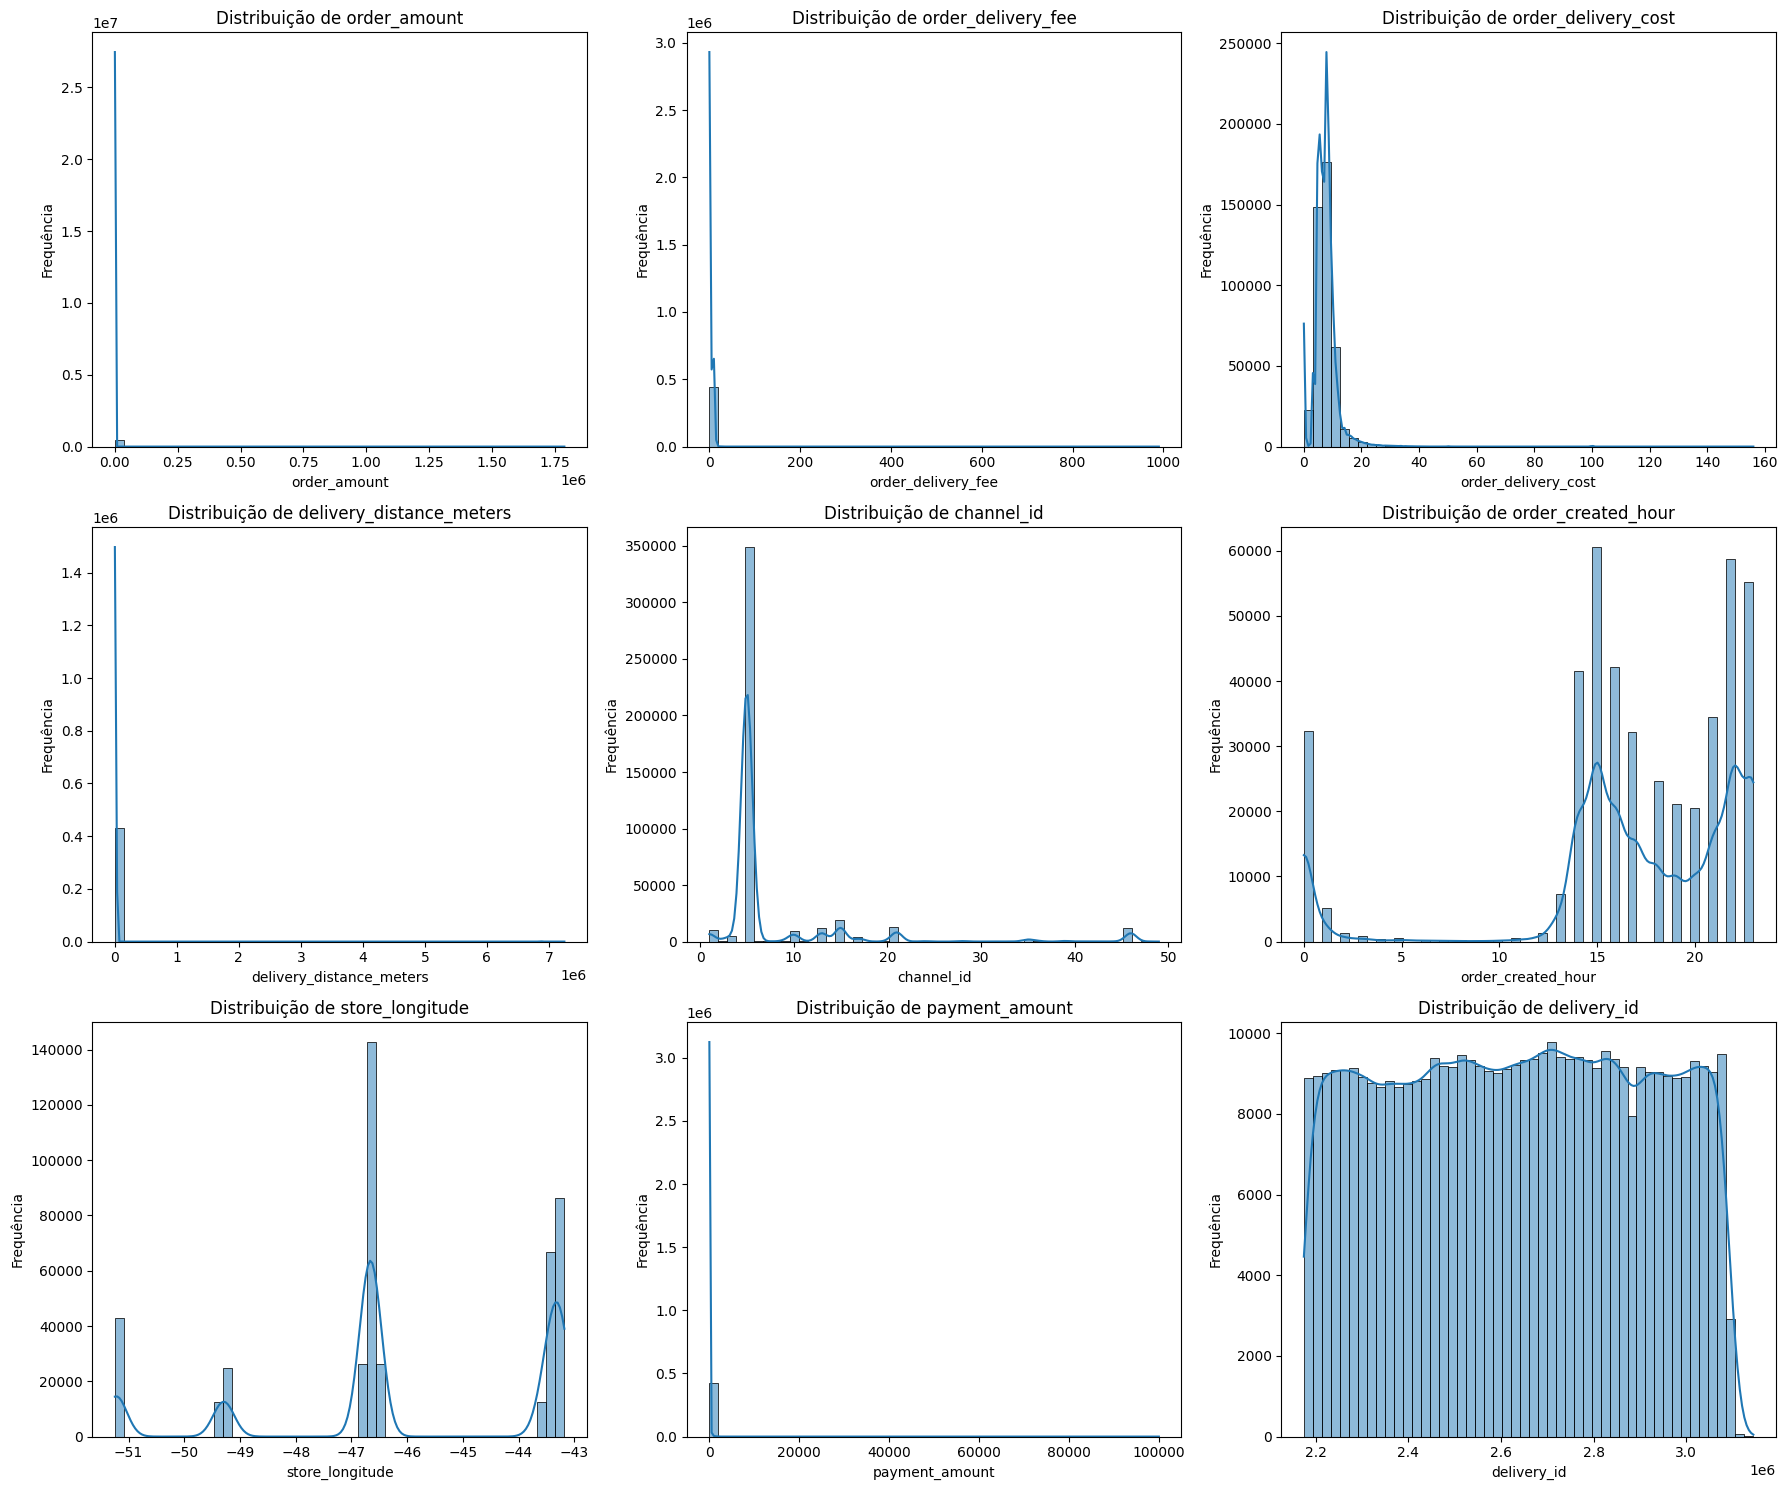

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variáveis numéricas analisadas
numerical_columns = ['order_amount', 'order_delivery_fee', 'order_delivery_cost', 'delivery_distance_meters', 'channel_id', 'order_created_hour', 'store_longitude', 'payment_amount', 'delivery_id']

# Criar um gráfico para cada variável
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    # Histograma
    sns.histplot(df[col], kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


### Visualização com Histogramas e KDE

Para explorar as distribuições das variáveis numéricas, utilizamos **histogramas com Kernel Density Estimate (KDE)**. Essa escolha facilita a visualização das distribuições, permitindo identificar padrões de assimetria e caudas pesadas.

#### Objetivos da Visualização:
- **Analisar a assimetria (skew)**: O histograma mostra visualmente caudas à direita ou à esquerda, facilitando a identificação de distribuições assimétricas.
- **Compreender a distribuição**: O KDE suaviza a distribuição, destacando padrões que podem não ser visíveis em um histograma tradicional.
- **Identificar outliers**: A presença de caudas pesadas indica valores extremos que podem distorcer a análise.

#### Justificativa:
- O histograma com KDE revela não só a frequência dos dados, mas também as características da distribuição, como a presença de caudas e a direção da assimetria.
- Ele ajuda a entender como as variáveis se comportam.
